# Exploratory Data Analysis (EDA) (Notebook 1_Week 3 Deliverable_Part2)

#### Import libraries

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#### Loading the Cleaned files

In [2]:
# Load the data
df = pd.read_csv('declarations-exterminations-punaises-de-lit-1.csv')

#### Verify Datatype and make modifications

In [3]:
print(df.dtypes)

NO_DECLARATION        int64
DATE_DECLARATION     object
DATE_PRIOR_INSP      object
EXT_FREQ            float64
DATE_FIRST_EXT       object
DATE_LAST_EXT        object
HOOD_NUM             object
HOOD_NAME            object
BORO_NAME            object
MTM8_X              float64
MTM8_Y              float64
LONGITUDE           float64
LATITUDE            float64
LONG_LAT             object
MTM_X_Y              object
dtype: object


In [4]:
# Convert 'DATE_INSP_VISPRE', 'DATE_DEBUTTRAIT', and 'DATE_FINTRAIT'
df['DATE_PRIOR_INSP'] = pd.to_datetime(df['DATE_PRIOR_INSP'])
df['DATE_FIRST_EXT'] = pd.to_datetime(df['DATE_FIRST_EXT'])
df['DATE_LAST_EXT'] = pd.to_datetime(df['DATE_LAST_EXT'])
df['DATE_DECLARATION'] = pd.to_datetime(df['DATE_DECLARATION'])

#### Difference between Declaration and Inspection Dates

In [5]:
# Ref.: https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

# Create difference between Declaration and Inspection
df['DATE_DIFF'] = round( (df['DATE_DECLARATION'] - df['DATE_PRIOR_INSP'] ) / np.timedelta64(1,'D') )

#df['DATE_DIFF'].fillna(0, inplace=True)

In [12]:
print(df['DATE_DIFF'].head())

0   37.00
1   65.00
2    6.00
3    1.00
4   40.00
Name: DATE_DIFF, dtype: float64


In [13]:
print(df['DATE_DIFF'].tail())

33360    9.00
33361   21.00
33362   13.00
33363    6.00
33364    3.00
Name: DATE_DIFF, dtype: float64


#### Create Columns

In [6]:
# Create a column extracting month
df['DEC_MONTH'] = pd.DatetimeIndex(df['DATE_DECLARATION']).month

# Create Declared Incidents column for regression purposes
df['DEC_ISSUE'] = 1

#### Populate blank values in EXT_FREQ 

In [ ]:
# Populate blanks with DATE_DECLARATION date and not time

df['DATE_FIRST_EXT'] = df['DATE_FIRST_EXT'].fillna(df['DATE_DECLARATION'].dt.date)

In [15]:
print('==================TYPES==================')
print(df.dtypes)
print('')
print('==================NULL_VALUES==================')
# Check for null values
print(df.isnull().sum())

==================TYPES==================
NO_DECLARATION        int64
DATE_DECLARATION     object
DATE_PRIOR_INSP      object
EXT_FREQ            float64
DATE_FIRST_EXT       object
DATE_LAST_EXT        object
HOOD_NUM             object
HOOD_NAME            object
BORO_NAME            object
MTM8_X              float64
MTM8_Y              float64
LONGITUDE           float64
LATITUDE            float64
LONG_LAT             object
MTM_X_Y              object
DEC_MONTH             int64
DEC_ISSUE             int64
dtype: object

==================NULL_VALUES==================
NO_DECLARATION         0
DATE_DECLARATION       0
DATE_PRIOR_INSP        8
EXT_FREQ               0
DATE_FIRST_EXT      2124
DATE_LAST_EXT       2124
HOOD_NUM               0
HOOD_NAME              0
BORO_NAME              0
MTM8_X                 0
MTM8_Y                 0
LONGITUDE              0
LATITUDE               0
LONG_LAT               0
MTM_X_Y                0
DEC_MONTH              0
DEC_ISSUE          

#### Populate blank values in EXT_FREQ 

In [14]:
# Populate blank values in EXT_FREQ 
df['EXT_FREQ'].fillna(1, inplace=True)

In [15]:
################################################
# Last section to work on.  Then can proceed to generate regression or whatever else you would like to do.

#df['DATE_FIRST_EXT'].fillna(df['DATE_DECLARATION'].dt.date)

#print('here ' + str(df['DATE_DECLARATION'].dt.date))
#print(df['DATE_DECLARATION'].dt.date)

# Not replacing the NAN fields
#df['DATE_FIRST_EXT'].fillna(pd.to_datetime(df['DATE_DECLARATION']).date(), inplace=True)

#df['DATE_FIRST_EXT'].fillna(df['DATE_DECLARATION'], inplace=True)
#pd.to_datetime(df['DATE_DECLARATION']).date()
#df['DATE_FIRST_EXT'].fillna(pd.to_datetime(df['DATE_DECLARATION']).date(), inplace=True)
#print(pd.to_datetime(df['DATE_DECLARATION']).date())
#pd.DatetimeIndex(df['DATE_DECLARATION']).year + '-' + pd.DatetimeIndex(df['DATE_DECLARATION']).month + '-' + pd.DatetimeIndex(df['DATE_DECLARATION']).day


#print(df['DATE_FIRST_EXT'])

# To be populated by the difference of the 2 fields afterwhich we can perform regression testing
# on fields DATE_DEC_FIRST, DECLARED, DATE_DIFF, EXT_FREQ
#df['DATE_DEC_FIRST'] = round((df['DATE_DECLARATION'] - df['DATE_FIRST_EXT'])/np.timedelta64(1,'D'))
####################################################


#### Populate blanks with DATE_DECLARATION date

In [16]:
# Populate blanks with DATE_DECLARATION date
df['DATE_FIRST_EXT'] = df['DATE_FIRST_EXT'].fillna(df['DATE_DECLARATION'].dt.date)

#### Dataframe summary

In [17]:
#print(df.shape)

print('Bed bug extermination declarations')
print('')
print('==================COLUMNS==================')
print(df.columns)
print('')
print('==================HEAD==================')
print(df.head())
print('')
print('==================DESCRIBE==================')
print(df.describe())

Bed bug extermination declarations

==================COLUMNS==================
Index(['NO_DECLARATION', 'DATE_DECLARATION', 'DATE_PRIOR_INSP', 'EXT_FREQ',
       'DATE_FIRST_EXT', 'DATE_LAST_EXT', 'HOOD_NUM', 'HOOD_NAME', 'BORO_NAME',
       'MTM8_X', 'MTM8_Y', 'LONGITUDE', 'LATITUDE', 'LONG_LAT', 'MTM_X_Y',
       'DATE_DIFF', 'DEC_MONTH', 'DEC_ISSUE'],
      dtype='object')

==================HEAD==================
   NO_DECLARATION DATE_DECLARATION DATE_PRIOR_INSP  EXT_FREQ  \
0            4254       2012-10-28      2012-09-21      1.00   
1             830       2011-09-16      2011-07-13      1.00   
2            1380       2011-11-08      2011-11-02      1.00   
3             455       2011-08-10      2011-08-09      1.00   
4            1243       2011-10-26      2011-09-16      1.00   

        DATE_FIRST_EXT DATE_LAST_EXT HOOD_NUM      HOOD_NAME  \
0  2012-09-21 00:00:00    2012-09-21       24     Beaurivage   
1  2011-07-27 00:00:00    2011-08-17       50    Saint-Henri   
2

In [18]:
print('==================BORO_VALUE_COUNT==================')
print(df['BORO_NAME'].value_counts())
print('')
print('==================ANALYSIS==================')
print('max:',np.max(df['BORO_NAME'].value_counts()))
print('min:',np.min(df['BORO_NAME'].value_counts()))
print('sum:',np.sum(df['BORO_NAME'].value_counts()))
print('mean:',np.mean(df['BORO_NAME'].value_counts()))
print('mean:',np.round(np.mean(df['BORO_NAME'].value_counts()),2))
print('std:',np.std(df['BORO_NAME'].value_counts()))
print('std:',np.round(np.std(df['BORO_NAME'].value_counts()),2))
print('median:',np.median(df['BORO_NAME'].value_counts()))
print ('count:',df['BORO_NAME'].value_counts().count())

==================BORO_VALUE_COUNT==================
Rosemont–La Petite-Patrie                   4320
Villeray–Saint-Michel–Parc-Extension        4304
Mercier–Hochelaga-Maisonneuve               4036
Le Plateau-Mont-Royal                       3696
Ville-Marie                                 3347
Côte-des-Neiges–Notre-Dame-de-Grâce         2909
Ahuntsic-Cartierville                       2695
Montréal-Nord                               1754
Le Sud-Ouest                                1251
Saint-Laurent                               1116
Saint-Léonard                                994
Verdun                                       782
Rivière-des-Prairies–Pointe-aux-Trembles     695
LaSalle                                      521
Lachine                                      361
Anjou                                        304
Outremont                                    145
Pierrefonds-Roxboro                          117
L'Île-Bizard–Sainte-Geneviève                 18
Name: BORO_NAME,

In [19]:
print('==================CORR==================')
print('Corr:',df.corr())

==================CORR==================
Corr:                 NO_DECLARATION  EXT_FREQ  MTM8_X  MTM8_Y  LONGITUDE  LATITUDE  \
NO_DECLARATION            1.00     -0.05   -0.05   -0.00      -0.05     -0.00   
EXT_FREQ                 -0.05      1.00    0.02    0.01       0.02      0.01   
MTM8_X                   -0.05      0.02    1.00    0.22       1.00      0.22   
MTM8_Y                   -0.00      0.01    0.22    1.00       0.22      1.00   
LONGITUDE                -0.05      0.02    1.00    0.22       1.00      0.22   
LATITUDE                 -0.00      0.01    0.22    1.00       0.22      1.00   
DATE_DIFF                 0.11     -0.03   -0.07    0.01      -0.07      0.01   
DEC_MONTH                 0.08     -0.05   -0.00    0.02      -0.00      0.02   
DEC_ISSUE                  nan       nan     nan     nan        nan       nan   

                DATE_DIFF  DEC_MONTH  DEC_ISSUE  
NO_DECLARATION       0.11       0.08        nan  
EXT_FREQ            -0.03      -0.05      

## Data Perspective
- One variable
    - Numeric variables
        - continuous: average income
        - discrete: population
    - Categorical variables
        - ordinal: grade
        - nominal: house, apartment, townhouse, etc.
- Multiple variables
    - Numeric x Numeric
    - Categorical x Numeric
    - Categorical x Categorical

## One Variable (numeric)

==================DESCRIBE==================
count   33357.00
mean       37.00
std        79.00
min      -348.00
25%         6.00
50%        15.00
75%        39.00
max      3737.00
Name: DATE_DIFF, dtype: float64



C:\Users\outpost\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\outpost\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

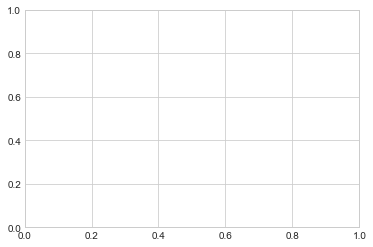

In [38]:
# Analyzing number of days between declaration and inspection

# Histogram
print('==================DESCRIBE==================')
print(df['DATE_DIFF'].describe().round())
print('')
plt.hist(df['DATE_DIFF'], bins=50)
plt.show()

# Box plot
#plt.boxplot(df['DEC_ISSUE'])
#plt.xticks([1], df['DEC_ISSUE'], rotation='horizontal')
#plt.show()

In [22]:
#TODO: Analyze all the numerical variables

## One Variable (categorical)

==================TOP_10_BORO==================
Rosemont–La Petite-Patrie               4320
Villeray–Saint-Michel–Parc-Extension    4304
Mercier–Hochelaga-Maisonneuve           4036
Le Plateau-Mont-Royal                   3696
Ville-Marie                             3347
Côte-des-Neiges–Notre-Dame-de-Grâce     2909
Ahuntsic-Cartierville                   2695
Montréal-Nord                           1754
Le Sud-Ouest                            1251
Saint-Laurent                           1116
Name: BORO_NAME, dtype: int64



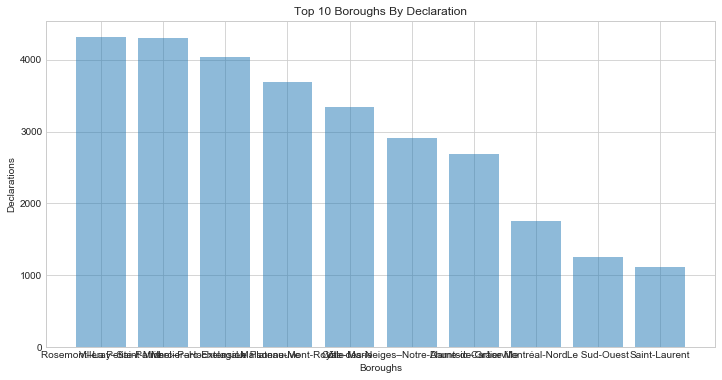

In [23]:
# Analyze by borough distribution
print('==================TOP_10_BORO==================')
print(df['BORO_NAME'].value_counts().head(10))
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Boroughs By Declaration')
plt.xlabel('Boroughs')
plt.ylabel('Declarations')

labels = df['BORO_NAME'].value_counts().head(10).index
values = df['BORO_NAME'].value_counts().head(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

In [24]:
#TODO: Analyze all the categorical variables

==================BOTTOM_10_BORO==================
Saint-Laurent                               1116
Saint-Léonard                                994
Verdun                                       782
Rivière-des-Prairies–Pointe-aux-Trembles     695
LaSalle                                      521
Lachine                                      361
Anjou                                        304
Outremont                                    145
Pierrefonds-Roxboro                          117
L'Île-Bizard–Sainte-Geneviève                 18
Name: BORO_NAME, dtype: int64



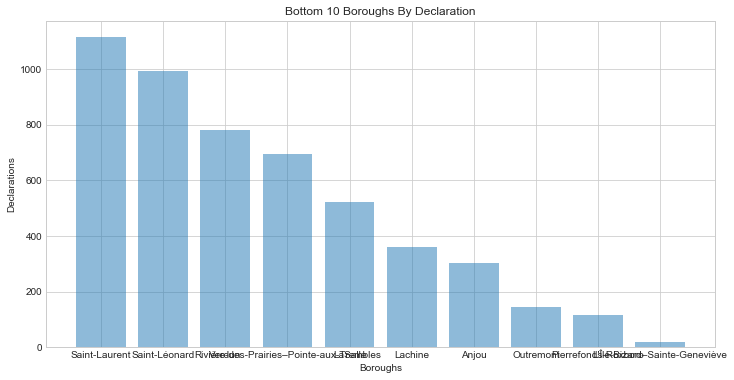

In [25]:
# Analyze borough distribution
print('==================BOTTOM_10_BORO==================')
print(df['BORO_NAME'].value_counts().tail(10))
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Bottom 10 Boroughs By Declaration')
plt.xlabel('Boroughs')
plt.ylabel('Declarations')

labels = df['BORO_NAME'].value_counts().tail(10).index
values = df['BORO_NAME'].value_counts().tail(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

==================TOP_10_HOOD==================
Sainte-Marie      1730
Crémazie          1205
Parc-Extension    1171
Maisonneuve       1150
Lorimier           964
Vieux-Rosemont     938
Est                866
Père-Marquette     800
Cartierville       793
Montagne           792
Name: HOOD_NAME, dtype: int64



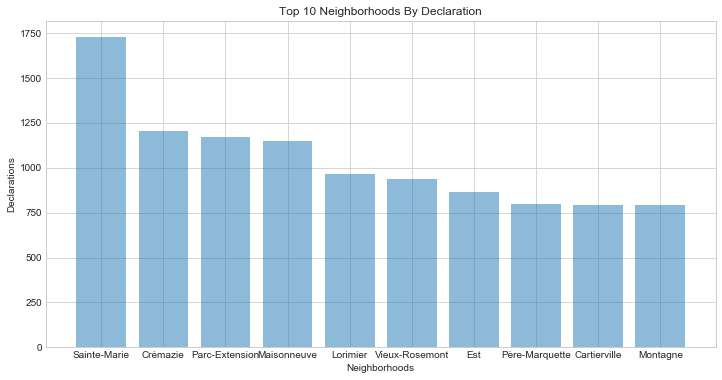

In [26]:
# Analyze Neighborhood distribution
print('==================TOP_10_HOOD==================')
print(df['HOOD_NAME'].value_counts().head(10))
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Neighborhoods By Declaration')
plt.xlabel('Neighborhoods')
plt.ylabel('Declarations')

labels = df['HOOD_NAME'].value_counts().head(10).index
values = df['HOOD_NAME'].value_counts().head(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

==================BOTTOM_10_HOOD==================
Ville-Émard                      89
Du College/Hodge                 79
Lachine-Ouest                    76
Dutrisac                         65
Guybourg                         64
Bois-Francs                      48
Rivière-des-Prairies             29
Pierrefonds-Ouest                21
Ile-des-Soeurs                   21
L'Île-Bizard–Sainte-Geneviève    18
Name: HOOD_NAME, dtype: int64



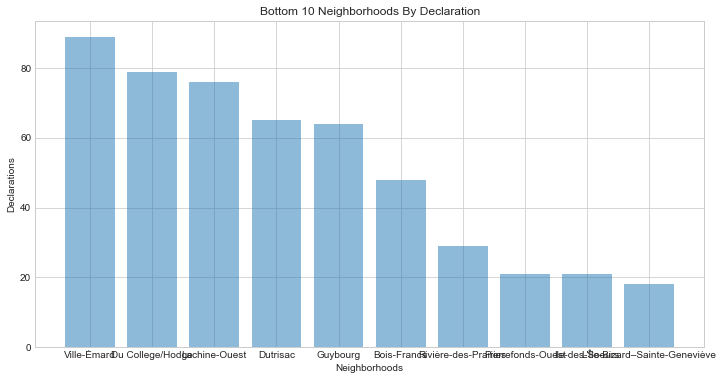

In [27]:
# Analyze Neighborhood distribution
print('==================BOTTOM_10_HOOD==================')
print(df['HOOD_NAME'].value_counts().tail(10))
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Bottom 10 Neighborhoods By Declaration')
plt.xlabel('Neighborhoods')
plt.ylabel('Declarations')

labels = df['HOOD_NAME'].value_counts().tail(10).index
values = df['HOOD_NAME'].value_counts().tail(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

==================DECLARATION_BY_MONTH_DESC==================
10    4022
9     3671
11    3379
7     3217
8     3202
12    2703
6     2552
2     2264
3     2186
5     2069
4     2069
1     2031
Name: DEC_MONTH, dtype: int64



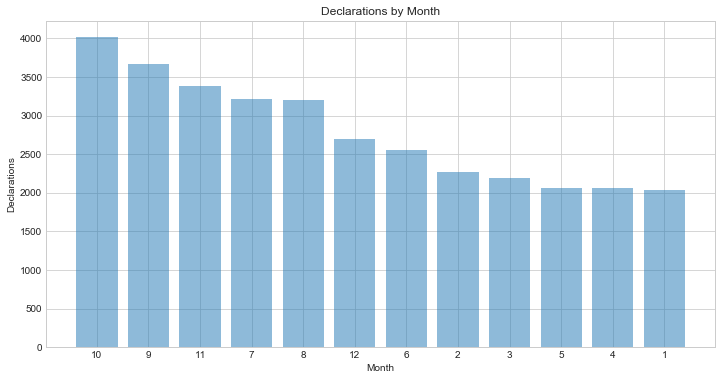

In [28]:
# Analyze Months distribution from declaration
print('==================DECLARATION_BY_MONTH_DESC==================')
print(df['DEC_MONTH'].value_counts())
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by Month')
plt.xlabel('Month')
plt.ylabel('Declarations')

labels = df['DEC_MONTH'].value_counts().head(12).index
values = df['DEC_MONTH'].value_counts().head(12).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

299241.0_5049383.8    264
292371.2_5047691.7    181
295384.6_5045734.1    151
298344.7_5039355.2    148
290179.3_5042045.3    139
298513.6_5039213.5    136
296512.2_5032054.7    116
299828.1_5043212.2    114
296610.3_5049394.6    107
294324.9_5040511.5    101
296445.3_5049181.5    100
296756.9_5049177.3     96
Name: MTM_X_Y, dtype: int64


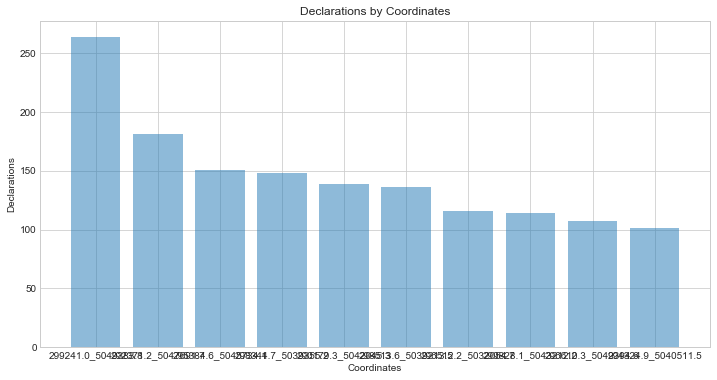

In [29]:
# Analyze Coordinates distribution from declaration
print(df['MTM_X_Y'].value_counts().head(12))

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by Coordinates')
plt.xlabel('Coordinates')
plt.ylabel('Declarations')

labels = df['MTM_X_Y'].value_counts().head(10).index
values = df['MTM_X_Y'].value_counts().head(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()


==================TOP_10_INTERSECTIONS_BASED_ON_LONG_LAT==================
-73.571239_45.584338                     264
-73.659233_45.569024                     181
-73.620588_45.551456                     151
-73.582592_45.49409                      148
-73.68714399999999_45.518173             139
-73.58043_45.492816999999995             136
-73.60591600000001_45.428377000000005    116
-73.563652_45.528809                     114
-73.604952_45.58441                      107
-73.634049_45.504446                     101
-73.607061_45.58249                      100
-73.60306800000001_45.582456              96
Name: LONG_LAT, dtype: int64



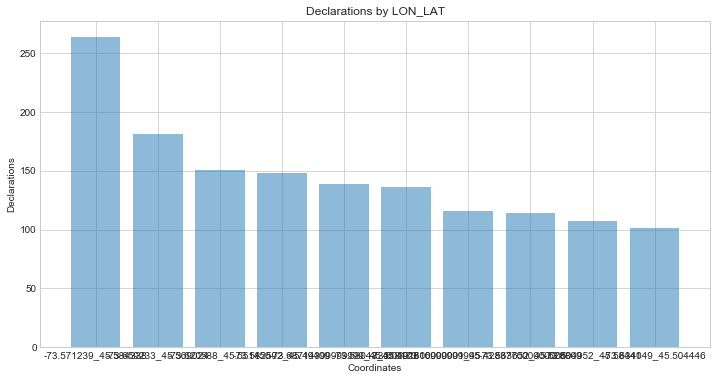

In [30]:
print('==================TOP_10_INTERSECTIONS_BASED_ON_LONG_LAT==================')
# Analyze Coordinates distribution from declaration
print(df['LONG_LAT'].value_counts().head(12))
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by LON_LAT')
plt.xlabel('Coordinates')
plt.ylabel('Declarations')

labels = df['LONG_LAT'].value_counts().head(10).index
values = df['LONG_LAT'].value_counts().head(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()


## Multiple variables (Numeric x Numeric)

#### Correlation

In [31]:
# Correlation
df.corr()

,NO_DECLARATION,EXT_FREQ,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,DATE_DIFF,DEC_MONTH,DEC_ISSUE
NO_DECLARATION,1.00,-0.05,-0.05,-0.00,-0.05,-0.00,0.11,0.08,nan
EXT_FREQ,-0.05,1.00,0.02,0.01,0.02,0.01,-0.03,-0.05,nan
MTM8_X,-0.05,0.02,1.00,0.22,1.00,0.22,-0.07,-0.00,nan
MTM8_Y,-0.00,0.01,0.22,1.00,0.22,1.00,0.01,0.02,nan
LONGITUDE,-0.05,0.02,1.00,0.22,1.00,0.22,-0.07,-0.00,nan
LATITUDE,-0.00,0.01,0.22,1.00,0.22,1.00,0.01,0.02,nan
DATE_DIFF,0.11,-0.03,-0.07,0.01,-0.07,0.01,1.00,0.05,nan
DEC_MONTH,0.08,-0.05,-0.00,0.02,-0.00,0.02,0.05,1.00,nan
DEC_ISSUE,nan,nan,nan,nan,nan,nan,nan,nan,nan


#### Heatmap for correlation

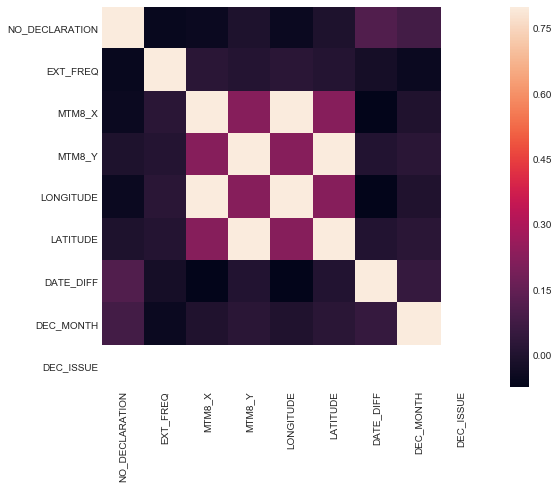

In [32]:
# heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [33]:
# Visualization : correlation between Price x SQFT

#plt.figure(figsize=(10,10))
#plt.xlabel('DATE_DIFF')
#plt.ylabel('DEC_MONTH')

#plt.plot(df['DATE_DIFF'], df['DEC_MONTH'], 'o', alpha=0.3)
#plt.show()

In [34]:
# TODO: Create a scatterplot Price x Mean Income
# TODO: What is the correlation between Price x Mean Income

## Multiple variables (Categorical x Numeric)

C:\Users\outpost\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\outpost\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\outpost\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\outpost\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1871: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\outpost\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


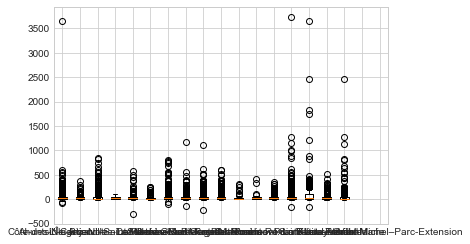

In [35]:
# Box plot to show the distribution between BOROUGHS x Number days between declaration and inspection
values = []
labels = []
for bdr in sorted(df['BORO_NAME'].unique()):
    labels.append(bdr)
    values.append(list(df[df['BORO_NAME']==bdr]['DATE_DIFF'].values))

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

## Multiple variables (Categorical x Categorical)

## Business Perspective
"An approximate answer to the right question is worth a great deal more than a precise answer to the wrong question." John Tukey

# Data Persepective

## One Variable

### Categorical

There are a few categorical values that we can generate utilizing our data.  This would be counts based on neighborhood (NOM_QR), borough (NOM_ARROND), declaration date (DATE_DECLARATION) and intersection location (COORD_X x COORD_Y) for longitude and latitude.  This would give us different insights on the infestations declared in the various areas of the city. 

In [ ]:
# Is the grade a good indicator of price?

In [ ]:
# Is the walking score a good indicator of price?

In [28]:
# Apply linear regression to the price

# We can use this regression test with our 4 columns.ie: DATE_DEC_FIRST, DECLARED, DATE_DIFF, EXT_FREQ

from sklearn import linear_model

# Create linear regression object
model = linear_model.LinearRegression()

columns = ['bedrooms', 'sqft_living15', 'grade', 'condition']

# Train the model using the training sets
model.fit(df[columns], df['price'])

# Print the Coefficients
print('Coefficients', np.round(model.coef_,2))
print('Interception', round(model.intercept_,2))
print('')
for i, col in enumerate(columns):
    print(col, round(model.coef_[i],1))

print('')
prediction = model.predict([[4, 3000, 10, 4]])
print('Prediction', prediction.round(1)[0])

KeyError: "['bedrooms' 'sqft_living15' 'grade' 'condition'] not in index"

In [ ]:
# Apply linear regression to the price considering the zipcode

from sklearn import linear_model

# Create linear regression object
model = linear_model.LinearRegression()

columns = ['bedrooms', 'sqft_living15', 'grade', 'condition']

# Train the model using the training sets
zipcode = 98000
model.fit(df[df['zipcode']==zipcode][columns], df[df['zipcode']==zipcode]['price'])

# Print the Coefficients
print('Coefficients', np.round(model.coef_,2))
print('Interception', round(model.intercept_,2))
print('')
for i, col in enumerate(columns):
    print(col, round(model.coef_[i],1))

print('')
prediction = model.predict([[4, 3000, 10, 4]])
print('Prediction', prediction.round(1)[0])

### Numerical

Based on the categorical values we generated above, we can then establish Min, Max, Mean values based on those Counts.  We can also generate Sums based on the number of visits by location or by time of year (based on declaration dates) to possibly gain insight on variables such as temperature or moving period (seasonal). 

## Multiple Variables

Multi variable statistics can also be generated based on our dataset to try and establish trends and gain further insight. Examples of such include:

-	Counts on borough (NOM_ARROND) and neighborhood (NOM_QR) by date of declaration
-	Number of days between DATE_INSP_VISPRE and DATE_DECLARATION. 
(Long waiting period can cause infestations to spread.)
-	Number of days between DATE_DECLARATION - DATE_DEBUTTRAIT
-	(Long waiting period can cause infestations to spread.)


# Business Persepective

### Descriptive Data Analysis

The City of Montreal bedbug infestation declarations dataset, which is available on the city website [Ref.], is analysed as part of this project.  The dataset contains a list of over 33,000 declarations of confirmed infestations located in the various boroughs.  Included in the dataset are 13 columns detailing the specific dates the infestations were declared along with unique declaration numbers per entry.  Each record also identifies the neighborhood and borough.  The specific locations are solely identified by coordinates to ensure the privacy of the residents.  The dataset also includes inspection dates along with the start and end periods for exterminations including the number of visits per household. 

The city clarifies some information concerning the data in the following manner.  “The declarations that are not associated exterminations have been removed from the dataset.”[Ref]  Therefore, the dataset pertains to households that have been treated.  Declarations linked to non-residential housing or out of the territory of the 19 boroughs have been removed. Finally, for confidentiality purposes, the closest intersection to the dwelling is reference rather the actual location.  Infestation reports since the 5th of July 2011 are included in the dataset.

The city website indicates that the data has a low degree of reliability due to the concern that they were entered manually by a third party, and the data is not validated by the City of Montreal. [Ref]

While analysing the data we found numerous entries, approximately 2,100, with a lack of inspection dates as well as missing start and end dates for the extermination along with missing values for number of visits required.  Since the city indicated that all declarations not associated with extermination declarations are removed from the dataset, we can conclude that a blank visits field is at minimum equal to 1 



[Ref 1] http://donnees.ville.montreal.qc.ca/dataset/declarations-exterminations-punaises-de-lit 

As for missing dates, the gaps were filled, if required, by using the Declaration and Inspection dates as approximates to feed the Start and End dates.  

Further investigation is required, in order to determine if several events, for the same location grouped under an intersection, are split into several reports. Specifically, the frequency of exterminations is capped at four for each report. [Ref 2]

[Ref 2] http://donnees.ville.montreal.qc.ca/dataset/declarations-exterminations-punaises-de-lit/resource/81a05c27-2563-4cf5-9c40-ffcc053e05de?inner_span=True). 

If more than four events occurred for a report, it needs to be determined through analysis of the data whether the records were split.


### Diagnostic Data Analysis

Bedbugs can spread and infest an area in numerous ways.  Based on government reports we know infestations can spread by human contact (clothing), unsanitary environments, along with used furniture and mattresses to name a few.  This exercise in data mining has been undertaken to potentially uncover flash points, periods and/or locations that can possibly bring to light problematic scenarios that we can rectify and decrease, if not eliminate, future infestations.

1.	Number of days between Inspection/Declaration and Start-End of extermination.  
(Given a lengthy waiting period we could have a potential opportunity for spreading)  

2.	Identify the most problematic boroughs
(What is the difference between worst and best ranked)

3.	Identify the most problematic neighborhood
(What is the difference between worst and best ranked)

4.	Based on 2 and 3, is the issue borough wide or at neighborhood level? 
(Management issue)

5.	When was the declaration made?
(Is the problem based on a specific time of year? Heat? Moving period?)

6.	Is a problem more relevant to a particular block?
(COORD_X x COORD_Y)

7.	Nbr_Exterminations x COORD_X x COORD_Y x Nom_QR
(Can the issue be subject to extermination mismanagement?) 
